In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

import seaborn as sns

In [3]:
stock = yf.Ticker("META")
actual = stock.history(start = "2022-06-26", end = "2024-06-26", auto_adjust=False)

print (actual.iloc[[0,-1]])

                                 Open        High         Low       Close  \
Date                                                                        
2022-06-27 00:00:00-04:00  171.320007  171.750000  168.009995  169.490005   
2024-06-25 00:00:00-04:00  497.049988  510.709991  495.500000  510.600006   

                            Adj Close    Volume  Dividends  Stock Splits  
Date                                                                      
2022-06-27 00:00:00-04:00  169.142426  29174600        0.0           0.0  
2024-06-25 00:00:00-04:00  510.600006  12109800        0.0           0.0  


Text(0, 0.5, 'Stock Price')

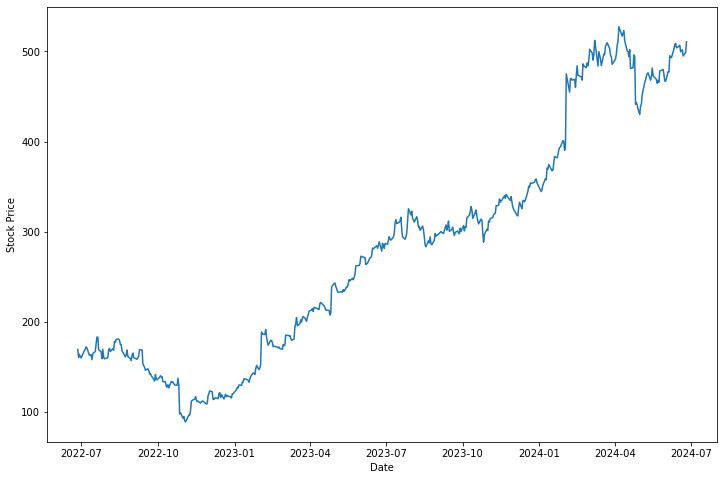

In [4]:
fig = plt.figure(figsize=(12,8))
plt.plot(actual['Close'])
plt.xlabel("Date")
plt.ylabel("Stock Price")

In [5]:
n_t = len(actual)
print ("Number of Days: ", n_t)

n_mc = 10000

St = pd.DataFrame (0., index = actual.index, columns= list(range(1,n_mc+1)))
St.iloc[0] = actual['Close'].iloc[0]

sig= 0.06

mu= 0.07
 
dt= 2./(n_t - 1)
print ("Daily Volume:", sig*np.sqrt(dt))

Number of Days:  502
Daily Volume: 0.00379094414163938


In [6]:
for i in range (1, n_t):
    ds2 = mu*dt + sig*np.sqrt(dt)*np.random.randn(n_mc)
    St.iloc[i]= St.iloc[i-1] + St.iloc[i-1]*ds2


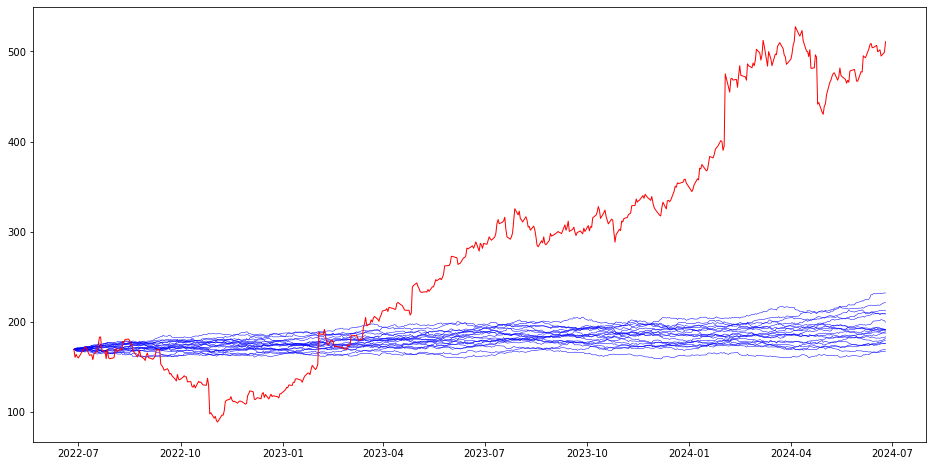

In [7]:
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot (111)

for i in np.random.choice (np.array(range(1,n_mc+1)), size= 20):
    axl.plot (St[i], 'b', lw=0.5)
    
axl.plot (actual['Close'], 'r', lw=1)
plt.show()

In [8]:
St_mc_mean= St.mean(axis=1)

St_th_mean= actual['Close'].iloc[0] * np.exp(mu*np.arange(n_t)/ n_t*2.)
St_th_mean= pd.DataFrame(St_th_mean, index=St_mc_mean.index)

print ("Expected Value from MC:", St_mc_mean.iloc[-1])
print ("Theoretical Expected Value:", St_th_mean.iloc[-1])

Expected Value from MC: 195.20134700106223
Theoretical Expected Value: 0    194.905549
Name: 2024-06-25 00:00:00-04:00, dtype: float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

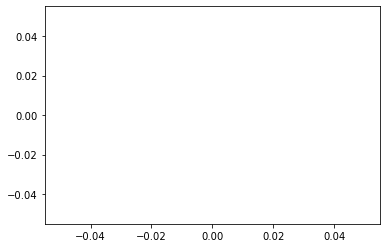

In [13]:
sns.kdeplot(St_mc_mean.to_numpy())

plt.xlabel("Price")
plt.ylabel("Probability Density")

plt.show()

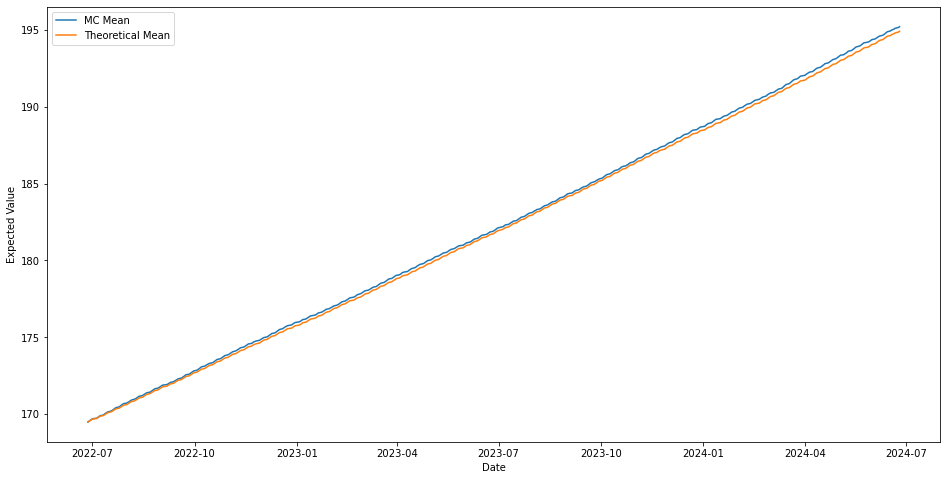

In [10]:
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot (111)
plt.plot(St_mc_mean)
plt.plot(St_th_mean)
plt.xlabel('Date')
plt.ylabel('Expected Value')
plt.legend(['MC Mean', 'Theoretical Mean'])

In [11]:
St_mc_median= St.median(axis=1)

St_th_median= actual['Close'].iloc[0] * np.exp(mu*np.arange(n_t)/ n_t*2.)
St_th_median= pd.DataFrame(St_th_median, index=St_mc_median.index)

print ("Expected Value from MC:", St_mc_median.iloc[-1])
print ("Theoretical Expected Value:", St_th_median.iloc[-1])

Expected Value from MC: 194.62892656314546
Theoretical Expected Value: 0    194.905549
Name: 2024-06-25 00:00:00-04:00, dtype: float64


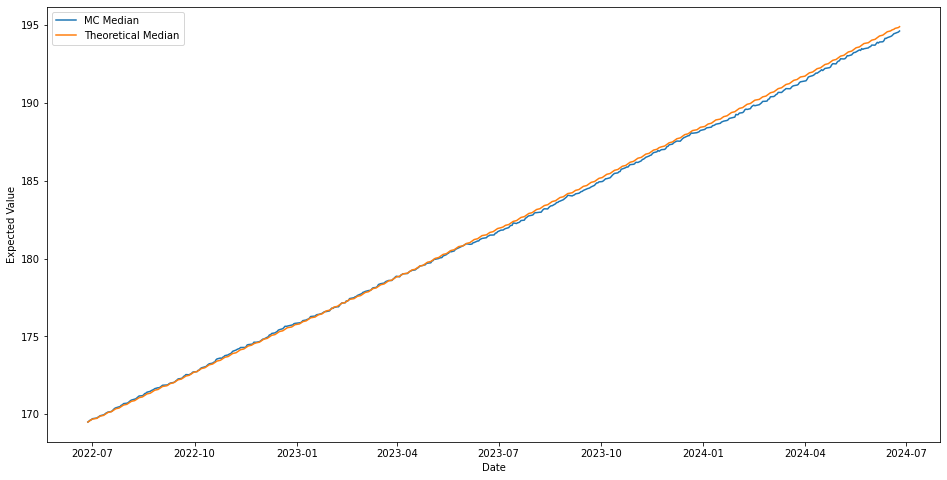

In [12]:
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot (111)
plt.plot(St_mc_median)
plt.plot(St_th_median)
plt.xlabel('Date')
plt.ylabel('Expected Value')
plt.legend(['MC Median', 'Theoretical Median'])

In [33]:
def generate_gmb_mc (actual, n_mc, mu= 0.1031, sig= 0.0407):
    n_t = len(actual)
    print ("Number of Days: ", n_t)

    n_mc = 10000

    St = pd.DataFrame (0., index = actual.index, columns= list(range(1,n_mc+1)))
    St.iloc[0] = actual['Close'].iloc[0]

    sig= 0.1462

    mu= 0.0439

    dt= 2./(n_t - 1)
    print ("Daily Volume:", sig*np.sqrt(dt))
    
    for i in range (1, n_t):
        ds2 = mu*dt + sig*np.sqrt(dt)*np.random.randn(n_mc)
        St.iloc[i]= St.iloc[i-1] + St.iloc[i-1]*ds2
    
    return St

In [34]:
St = generate_gmb_mc (actual, n_mc= 20000)

Number of Days:  501
Daily Volume: 0.009246499878332341


In [13]:
print (St)

                                1           2           3           4      \
Date                                                                        
2022-03-31 00:00:00-04:00  136.320007  136.320007  136.320007  136.320007   
2022-04-01 00:00:00-04:00  135.817692  135.362955  134.717382  138.172135   
2022-04-04 00:00:00-04:00  136.059494  135.117723  135.853965  140.204442   
2022-04-05 00:00:00-04:00  138.904806  134.049178  136.627433  138.149355   
2022-04-06 00:00:00-04:00  138.747392  136.872879  136.053199  142.633751   
...                               ...         ...         ...         ...   
2024-03-22 00:00:00-04:00  142.303580  107.668423  188.693057  278.070815   
2024-03-25 00:00:00-04:00  142.980347  108.210542  189.007483  281.570912   
2024-03-26 00:00:00-04:00  144.308913  107.877286  189.841572  279.758740   
2024-03-27 00:00:00-04:00  143.813835  108.718169  189.466247  277.565624   
2024-03-28 00:00:00-04:00  139.797351  107.452295  192.328027  273.877136   